In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from __future__ import division

__author__     =['John C. Hood II']
__copyright__  =["Copyright 2019 John C. Hood II"]
__email__      =['hood.astro@gmail.com']
__maintainer__ =['John C. Hood II']


##FULL VAN TEST PLOTTING ALL OF THE DATA COLLECTED
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import *
from pylab import *
import glob
import sys
from numpy import arange,array,ones
from scipy import stats
import math
import os
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
sns.set(style='ticks')
size_ylabel = 12

In [2]:
analysis_tests_file_directory = '/Users/JohnHood/Documents/UofC/OMT_VNA_Testing/JH_20190709_asembly_test_results/'
original_tests_file_directory = '/Users/JohnHood/Documents/UofC/OMT_VNA_Testing/JH_20181212_ELC_test_board_results/'
full_assembly_file_directory  = '/Users/JohnHood/Documents/UofC/OMT_Assembly_folders/assembly_test_results/'

In [28]:
no_assembly_at_port              = ''+analysis_tests_file_directory+'S11_reflection_and_phase_no_assembly.csv'
no_assembly_at_port_data         = pd.read_csv(no_assembly_at_port, skiprows=4)
no_assembly_at_port_data.columns            =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real2_S11',
                                  'imaginary2_S11',
                                  'real_S22',
                                  'imaginary_S22',
                                  'real2_S22',
                                  'imaginary2_S22',
                                  'real_memory_S22',
                                  'imaginary_memory_S22',
                                  'real_memory_S11',
                                  'imaginary_memory_S11',
                                  'NA']

one_inch_microstrip                       = ''+original_tests_file_directory+'1_INCH_MICROSTRIP.csv'
one_inch_microstrip_data                  = pd.read_csv(one_inch_microstrip, comment="#")


one_inch_microstrip_data.columns          =['frequency',
                                            'real_S12',
                                            'imaginary_S12',
                                            'real_S21',
                                            'imaginary_S21',
                                            'real_S11',
                                            'imaginary_S11',
                                            'real_S22',
                                            'imaginary_S22',
                                            'real_memory_S22',
                                            'imaginary_memory_S22',
                                            'real_memory_S21',
                                            'imaginary_memory_S21',
                                            'real_memory_S12',
                                            'imaginary_memory_S12',
                                            'real_memory_S11',
                                            'imaginary_memory_S11',
                                            'NA']   

##### FULL ASSEMBLY DATA #####
CA_only_elcs          = ''+full_assembly_file_directory+'complete_assembly_no_chip_just_elcs.csv'
CA_only_elcs_data     = pd.read_csv(CA_only_elcs, skiprows=2)
CA_only_elcs_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_phase_S11',
                                  'imaginary_phase_S11',
                                  'NA']

CA_blank          = ''+full_assembly_file_directory+'complete_assembly_no_chip_or_elcs.csv'
CA_blank_data     = pd.read_csv(CA_blank, skiprows=2)
CA_blank_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_phase_S11',
                                  'imaginary_phase_S11',
                                  'NA']
CA_terminated          = ''+full_assembly_file_directory+'complete_assembly_with_chip_all_terminated.csv'
CA_terminated_data     = pd.read_csv(CA_terminated, skiprows=2)
CA_terminated_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_S12',
                                  'imaginary_S12',
                                  'real_S22',
                                  'imaginary_S22',
                                  'real_S21',
                                  'imaginary_S21',
                                  'NA']

CA_port1_B          = ''+full_assembly_file_directory+'complete_assembly_with_chip_and_loads_port_1_unpol.csv'
CA_port1_B_data     = pd.read_csv(CA_port1_B , skiprows=2)
CA_port1_B_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_S12',
                                  'imaginary_S12',
                                  'real_S22',
                                  'imaginary_S22',
                                  'real_S21',
                                  'imaginary_S21',
                                  'NA']

CA_port3_B          = ''+full_assembly_file_directory+'complete_assembly_with_chip_and_loads_port_3_unpol.csv'
CA_port3_B_data     = pd.read_csv(CA_port3_B , skiprows=2)
CA_port3_B_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_S12',
                                  'imaginary_S12',
                                  'real_S22',
                                  'imaginary_S22',
                                  'real_S21',
                                  'imaginary_S21',
                                  'NA']

CA_port2_E          = ''+full_assembly_file_directory+'complete_assembly_with_chip_and_loads_port_2_pol.csv'
CA_port2_E_data     = pd.read_csv(CA_port2_E , skiprows=2)
CA_port2_E_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_S12',
                                  'imaginary_S12',
                                  'real_S22',
                                  'imaginary_S22',
                                  'real_S21',
                                  'imaginary_S21',
                                  'NA']

CA_port4_E          = ''+full_assembly_file_directory+'complete_assembly_with_chip_and_loads_port_4_pol.csv'
CA_port4_E_data     = pd.read_csv(CA_port4_E , skiprows=2)
CA_port4_E_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_S12',
                                  'imaginary_S12',
                                  'real_S22',
                                  'imaginary_S22',
                                  'real_S21',
                                  'imaginary_S21',
                                  'NA']

CA_loaded_chip          = ''+full_assembly_file_directory+'complete_assembly_with_chip_and_loads.csv'
CA_loaded_chip_data     = pd.read_csv(CA_loaded_chip, skiprows=2)
CA_loaded_chip_data.columns      =['frequency',
                                  'real_S12',
                                  'imaginary_S12',
                                  'real_S11',
                                  'imaginary_S11',
                                  'NA']

CA_only_chip          = ''+full_assembly_file_directory+'complete_assembly_only_chip.csv'
CA_only_chip_data     = pd.read_csv(CA_only_chip, skiprows=2)
CA_only_chip_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_S12',
                                  'imaginary_S12',
                                  'NA']

CA_busted_chip          = ''+full_assembly_file_directory+'complete_assembly_chip_no_probes.csv'
CA_busted_chip_data     = pd.read_csv(CA_busted_chip, skiprows=2)
CA_busted_chip_data.columns      =['frequency',
                                  'real_S11',
                                  'imaginary_S11',
                                  'real_S12',
                                  'imaginary_S12',
                                  'NA']


gold_resistance      = ''+full_assembly_file_directory+'gold_resistance.csv'
gold_resistance_data = pd.read_csv(gold_resistance, skiprows=1)
gold_resistance_data.columns   =['length','omega']

In [5]:
CA_port1_B_data.dtypes

frequency        float64
real_S11         float64
imaginary_S11    float64
real_S12         float64
imaginary_S12    float64
real_S22         float64
imaginary_S22    float64
real_S21         float64
imaginary_S21    float64
NA               float64
dtype: object

In [6]:
gigahertz     = (CA_blank_data['frequency'] / (10**9))

In [7]:
for i in range(len(one_inch_microstrip_data)):
    def db_magnitude_S21(data):
        magnitude_S21                              = 20*log10(abs(np.asarray(data['real_S21']) + 1j * 
                                             np.asarray(data['imaginary_S21'])))

        return magnitude_S21
    
for i in range(len(one_inch_microstrip_data)):
    def db_magnitude_S12(data):
        magnitude_S12                          = 20*log10(abs(np.asarray(data['real_S12']) + 1j * 
                                             np.asarray(data['imaginary_S12'])))
        return magnitude_S12 

for i in range(len(one_inch_microstrip_data)):
    def db_magnitude_S11(data):
        magnitude_S11                          = 20*log10(abs(np.asarray(data['real_S11']) + 1j * 
                                             np.asarray(data['imaginary_S11'])))
        return magnitude_S11

for i in range(len(one_inch_microstrip_data)):
    def db_magnitude_S22(data):
        magnitude_S22                              = 20*log10(abs(np.asarray(data['real_S22']) + 1j * 
                                             np.asarray(data['imaginary_S22'])))
        return magnitude_S22

In [8]:
###USE THE SAME CALCULATIONS FORM THE DB FUNCTIONS BUT WITH ANGLE TO GET THE PAHSE TO PLOT HERE!!!
for i in range(len(one_inch_microstrip_data)):
    def phase_memory_S11(data):
        power                              = (np.asarray(data['real_S11']) + 1j * 
                                             np.asarray(data['imaginary_S11']))
        
        memory                             = (np.asarray(no_assembly_at_port_data['real_S11']) + 1j * 
                                             np.asarray(no_assembly_at_port_data['imaginary_S11']))
        
        phase_memory_S11                          = np.angle(power/memory)
        return phase_memory_S11

for i in range(len(one_inch_microstrip_data)):
    def phase_memory_S22(data):
        power                              = (np.asarray(data['real_S22']) + 1j * 
                                             np.asarray(data['imaginary_S22']))
        
        memory                             = (np.asarray(data['real_memory_S22']) + 1j * 
                                             np.asarray(data['imaginary_memory_S22']))
        
        phase_memory_S22                          = np.angle(power/memory)
        return phase_memory_S22

 Figure:CA_no_chip_just_elcs.png


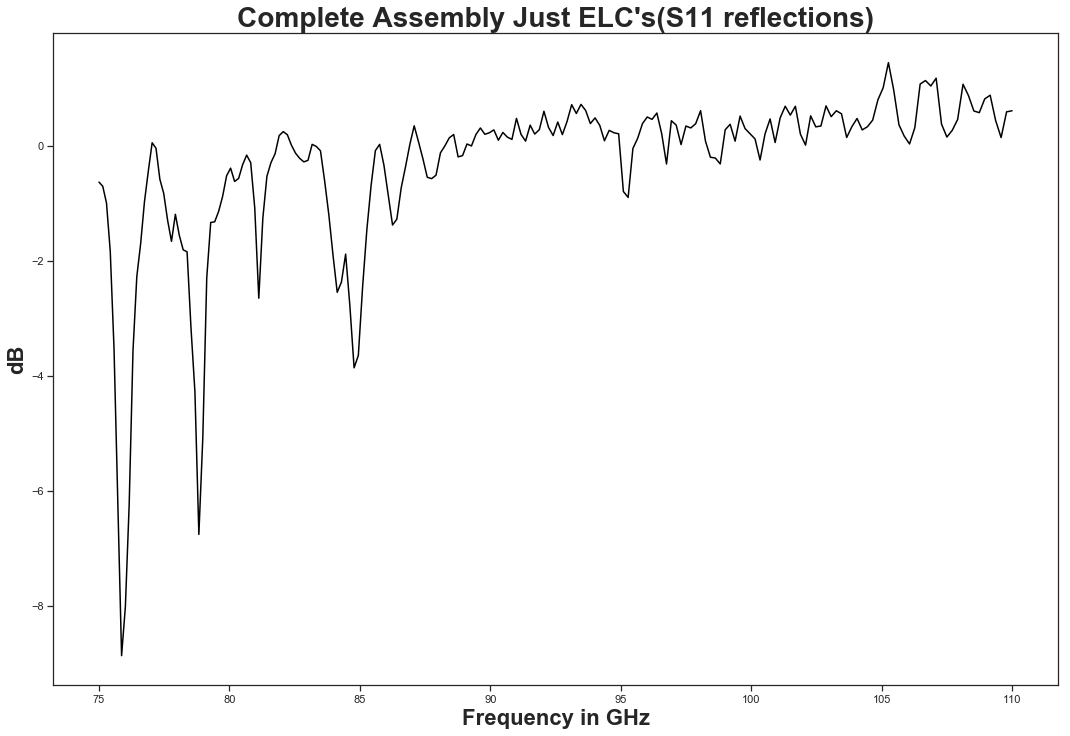

In [9]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_only_elcs_data),
         color='black')

plt.title("Complete Assembly Just ELC's(S11 reflections)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_no_chip_just_elcs.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_blank.png


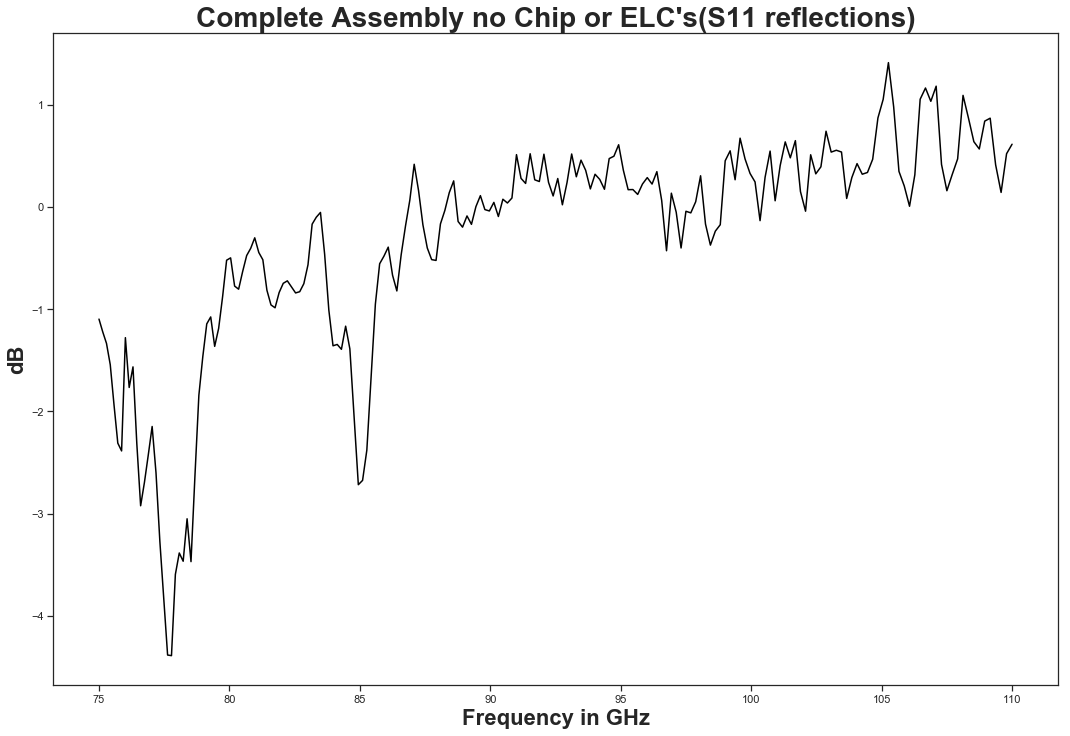

In [10]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_blank_data),
         color='black')
plt.title("Complete Assembly no Chip or ELC's(S11 reflections)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_blank.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_terminated.png


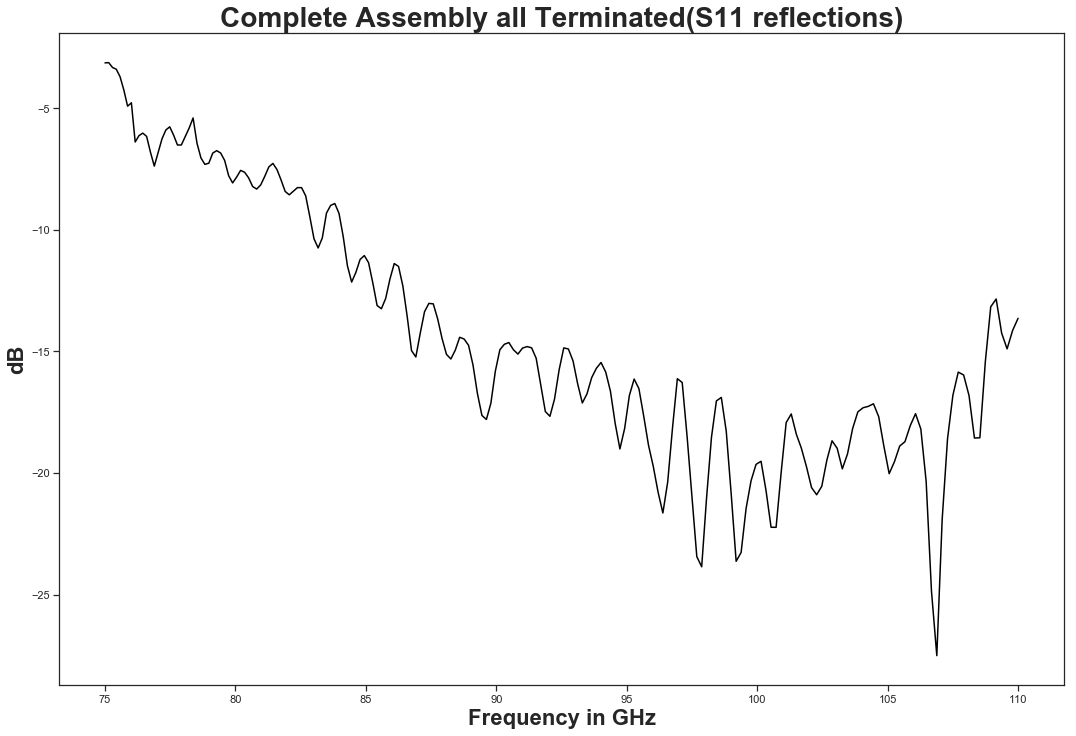

In [11]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_terminated_data),
         color='black')
plt.title("Complete Assembly all Terminated(S11 reflections)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_terminated.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_port1_B.png


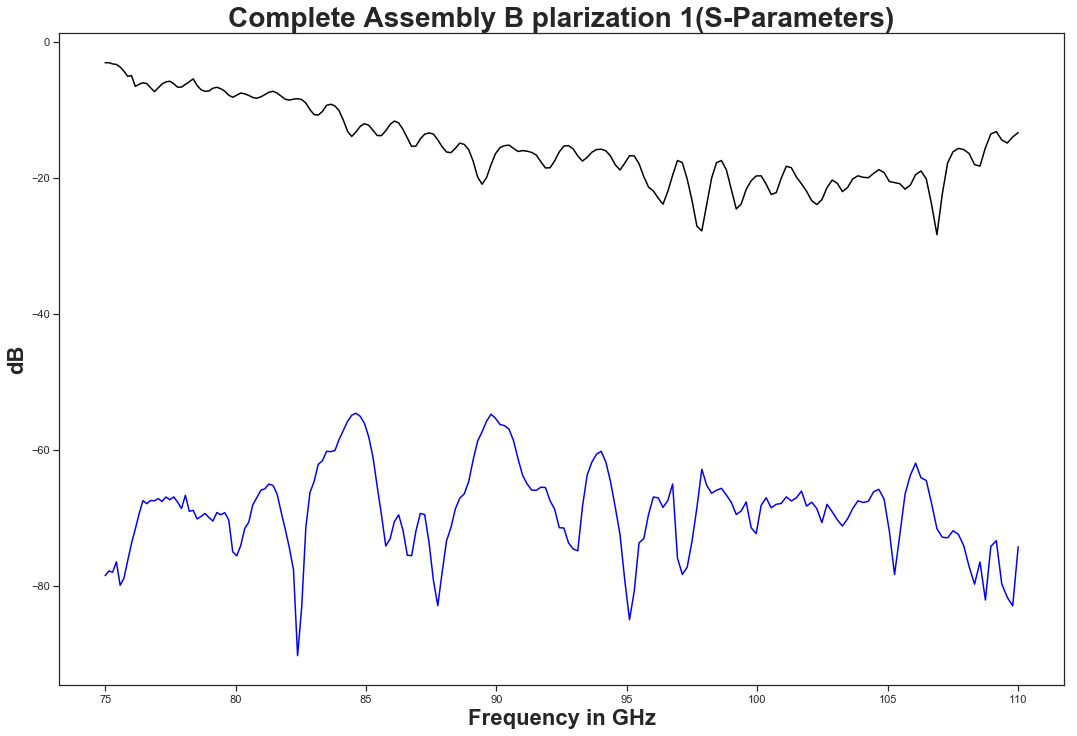

In [12]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port1_B_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port1_B_data),
         color='blue')
plt.title("Complete Assembly B plarization 1(S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_port1_B.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_port3_B.png


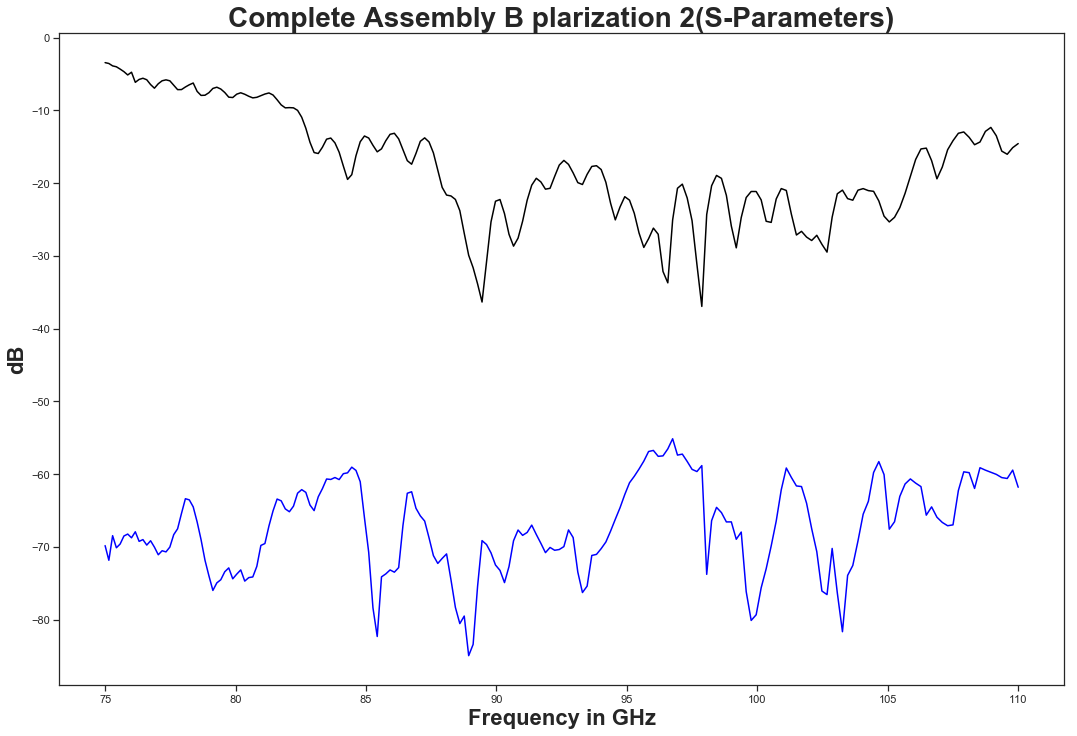

In [13]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port3_B_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port3_B_data),
         color='blue')
plt.title("Complete Assembly B plarization 2(S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_port3_B.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_port2_E.png


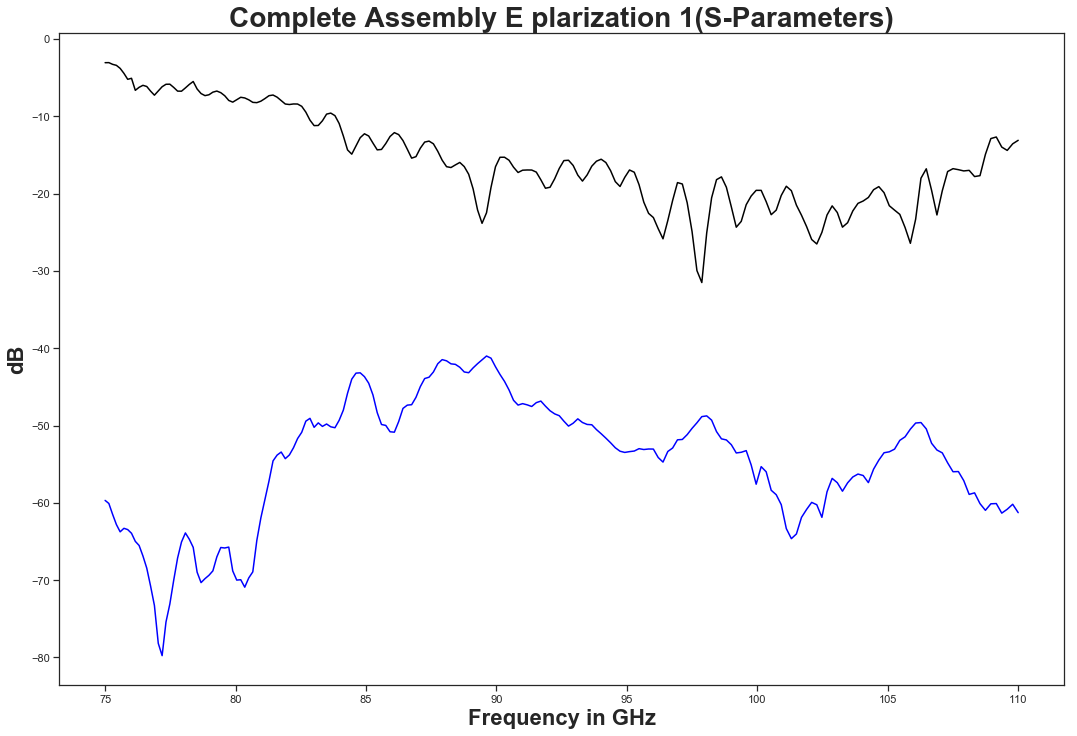

In [14]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port2_E_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port2_E_data),
         color='blue')
plt.title("Complete Assembly E plarization 1(S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_port2_E.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_port4_E.png


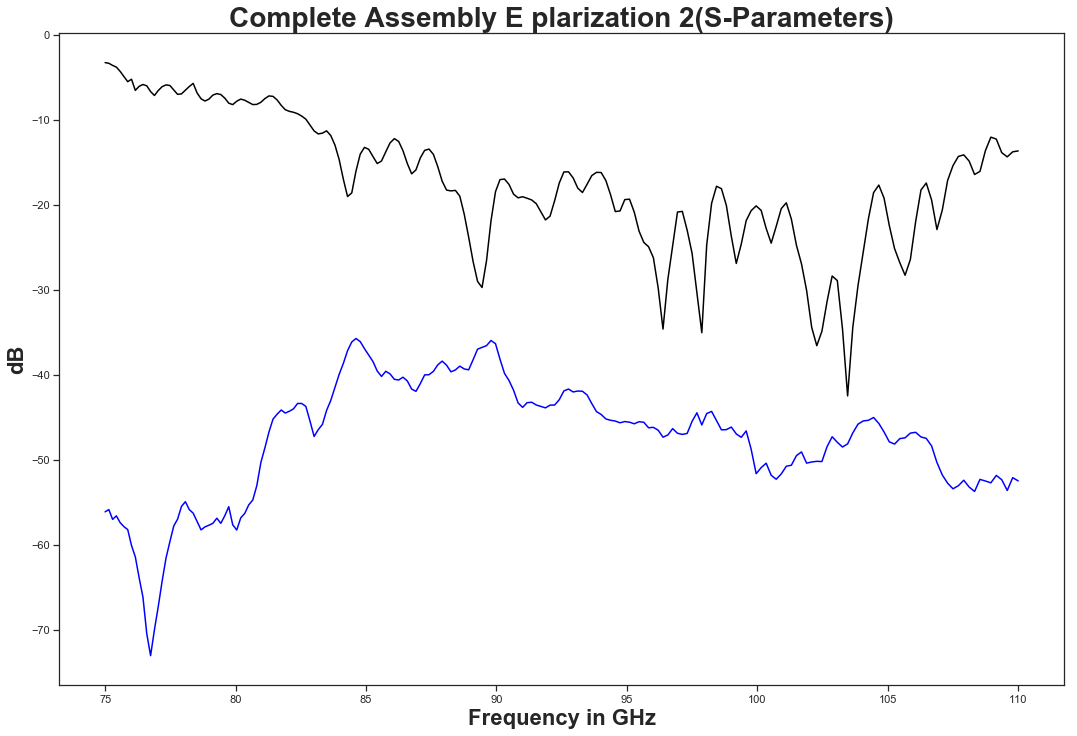

In [15]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port4_E_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port4_E_data),
         color='blue')
plt.title("Complete Assembly E plarization 2(S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_port4_E.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_no_chip_just_elcs_and_blank.png


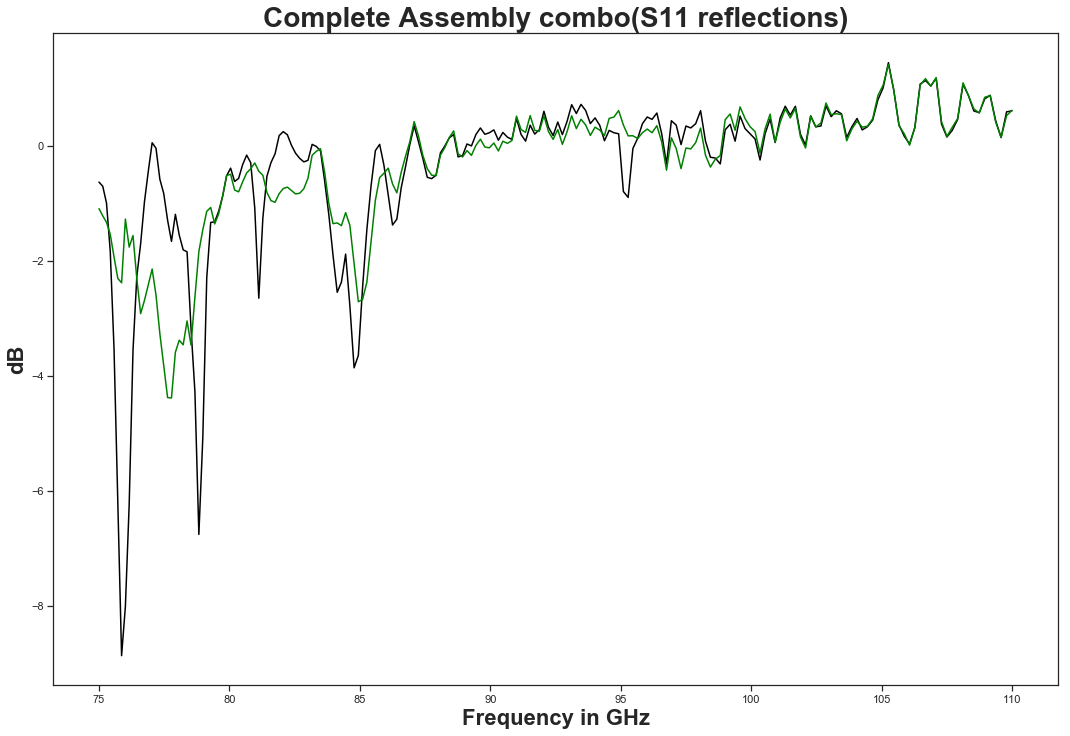

In [16]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_only_elcs_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S11(CA_blank_data),
         color='green')

plt.title("Complete Assembly combo(S11 reflections)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_no_chip_just_elcs_and_blank.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_E_field_combo.png


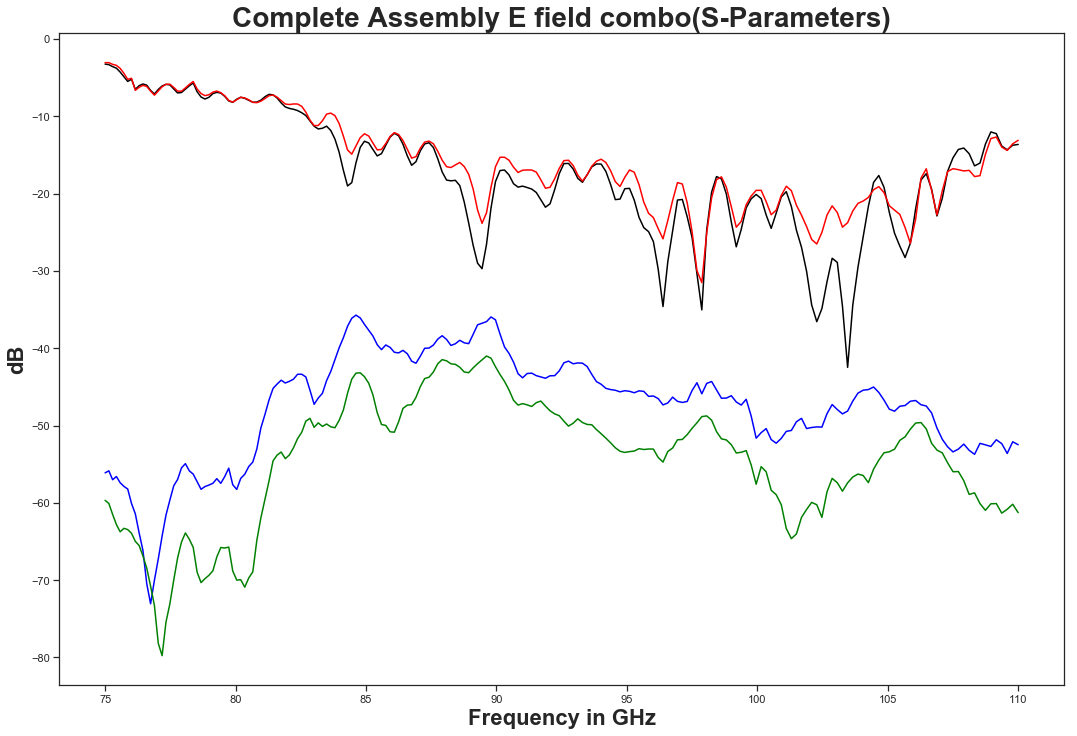

In [17]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port4_E_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port4_E_data),
         color='blue')
plt.plot(gigahertz, db_magnitude_S11(CA_port2_E_data),
         color='red')
plt.plot(gigahertz, db_magnitude_S12(CA_port2_E_data),
         color='green')

plt.title("Complete Assembly E field combo(S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_E_field_combo.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_B_field_combo.png


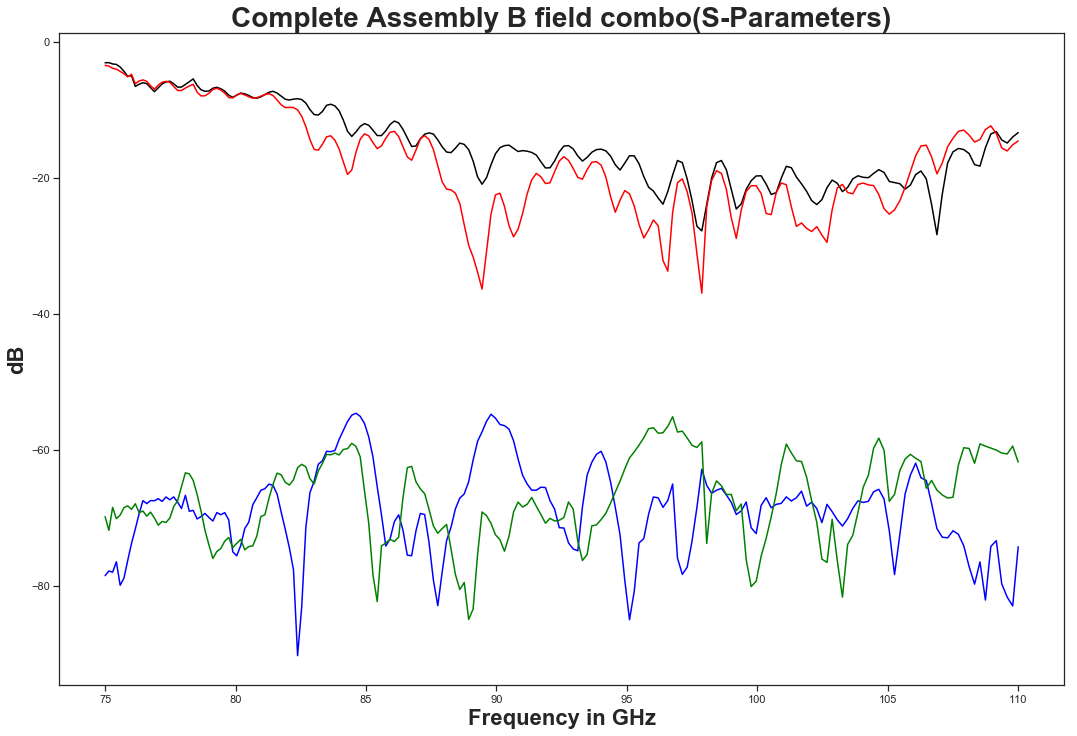

In [18]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port1_B_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port1_B_data),
         color='blue')
plt.plot(gigahertz, db_magnitude_S11(CA_port3_B_data),
         color='red')
plt.plot(gigahertz, db_magnitude_S12(CA_port3_B_data),
         color='green')

plt.title("Complete Assembly B field combo(S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_B_field_combo.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_B_field_combo_all_port_1.png


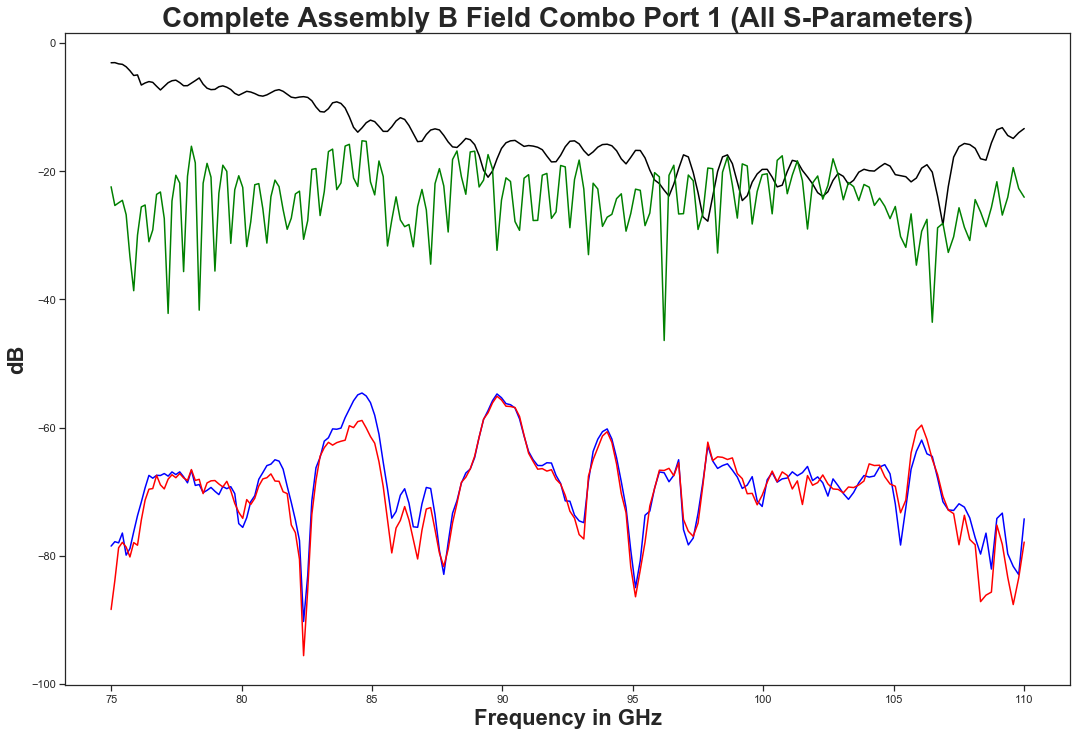

In [19]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port1_B_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port1_B_data),
         color='blue')
plt.plot(gigahertz, db_magnitude_S21(CA_port1_B_data),
         color='red')
plt.plot(gigahertz, db_magnitude_S22(CA_port1_B_data),
         color='green')
plt.title("Complete Assembly B Field Combo Port 1 (All S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_B_field_combo_all_port_1.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_B_field_combo_all_port_3.png


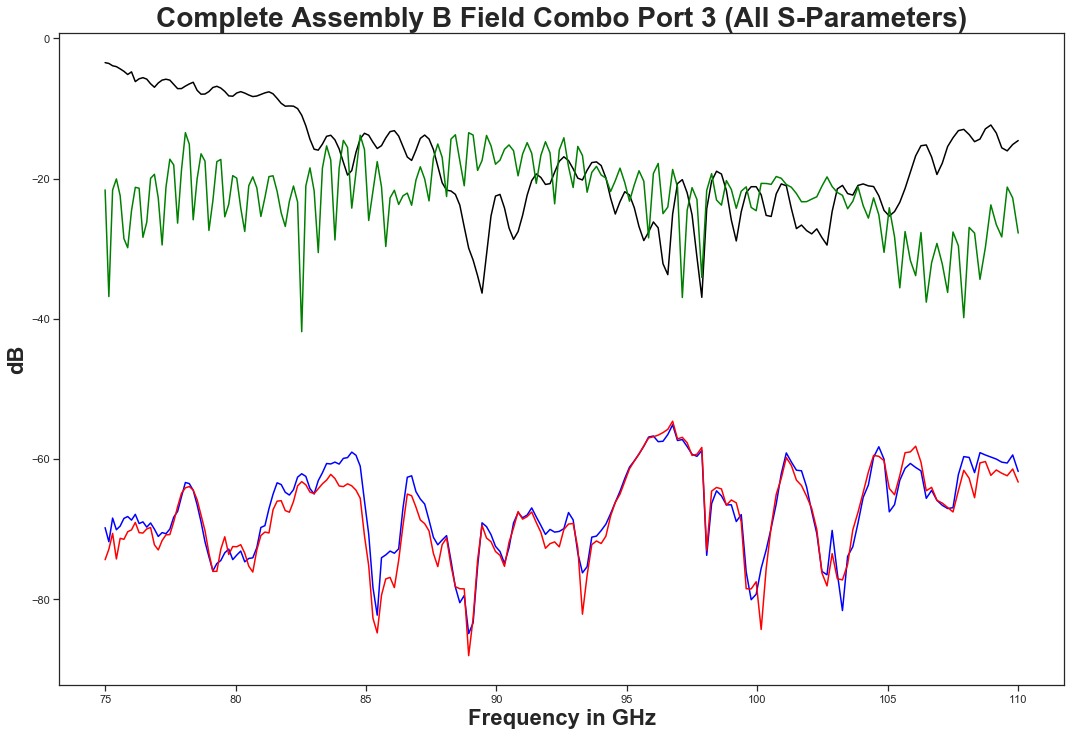

In [20]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port3_B_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port3_B_data),
         color='blue')
plt.plot(gigahertz, db_magnitude_S21(CA_port3_B_data),
         color='red')
plt.plot(gigahertz, db_magnitude_S22(CA_port3_B_data),
         color='green')
plt.title("Complete Assembly B Field Combo Port 3 (All S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_B_field_combo_all_port_3.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_E_field_combo_all_port_2.png


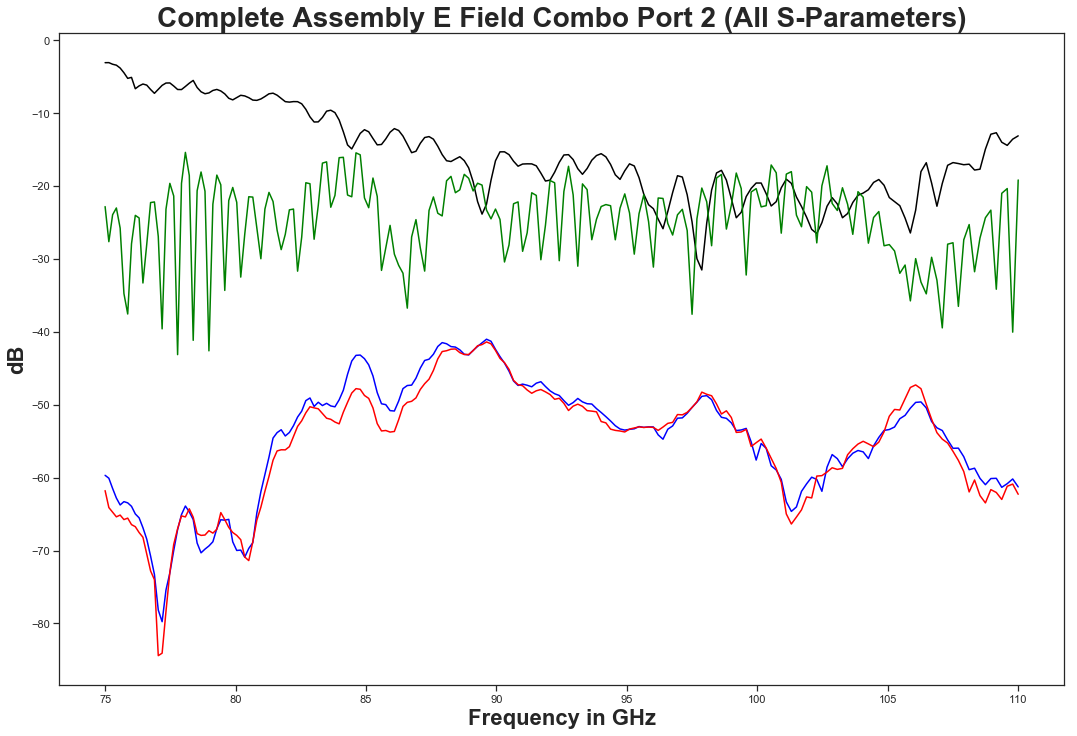

In [21]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port2_E_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port2_E_data),
         color='blue')
plt.plot(gigahertz, db_magnitude_S21(CA_port2_E_data),
         color='red')
plt.plot(gigahertz, db_magnitude_S22(CA_port2_E_data),
         color='green')
plt.title("Complete Assembly E Field Combo Port 2 (All S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_E_field_combo_all_port_2.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_E_field_combo_all_port_4.png


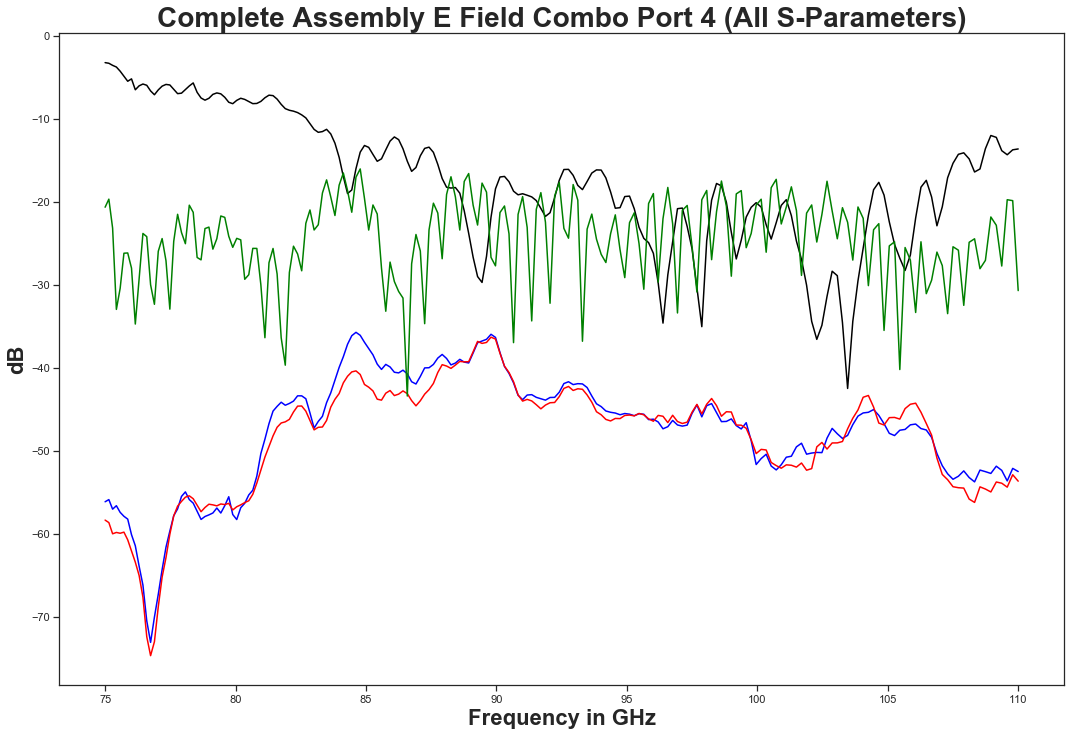

In [22]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_port4_E_data),
         color='black')
plt.plot(gigahertz, db_magnitude_S12(CA_port4_E_data),
         color='blue')
plt.plot(gigahertz, db_magnitude_S21(CA_port4_E_data),
         color='red')
plt.plot(gigahertz, db_magnitude_S22(CA_port4_E_data),
         color='green')
plt.title("Complete Assembly E Field Combo Port 4 (All S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_E_field_combo_all_port_4.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_chip_only.png


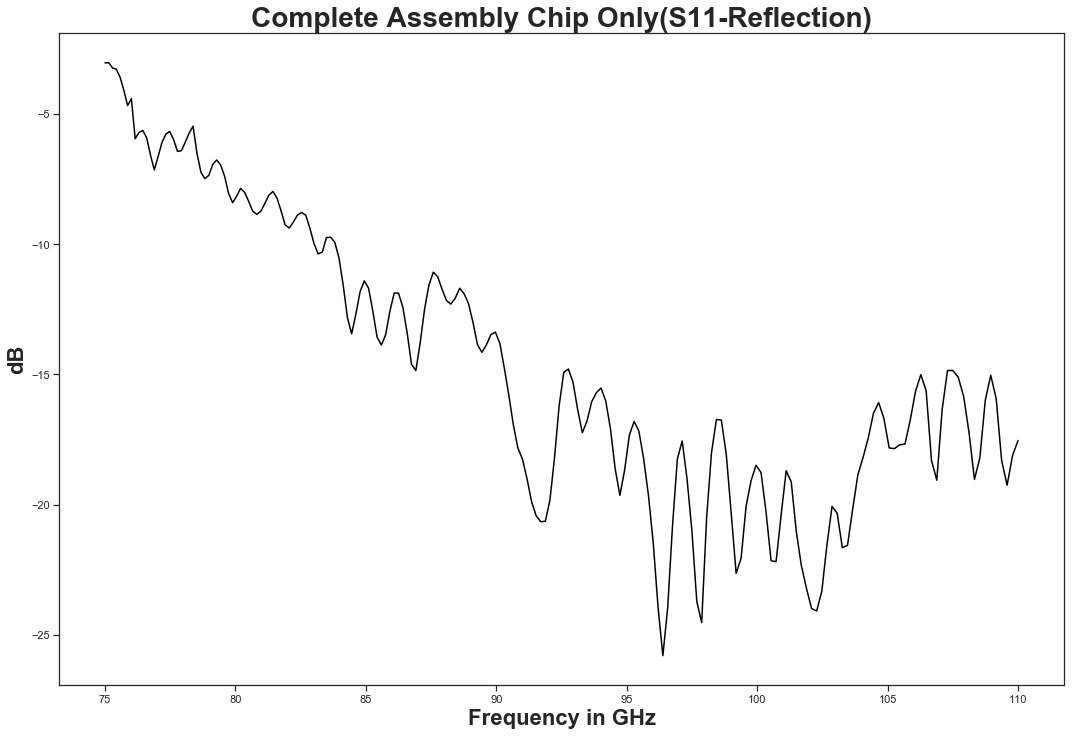

In [23]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_only_chip_data),
         color='black')
plt.title("Complete Assembly Chip Only(S11-Reflection)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_chip_only.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_chip_only_phase.jpg


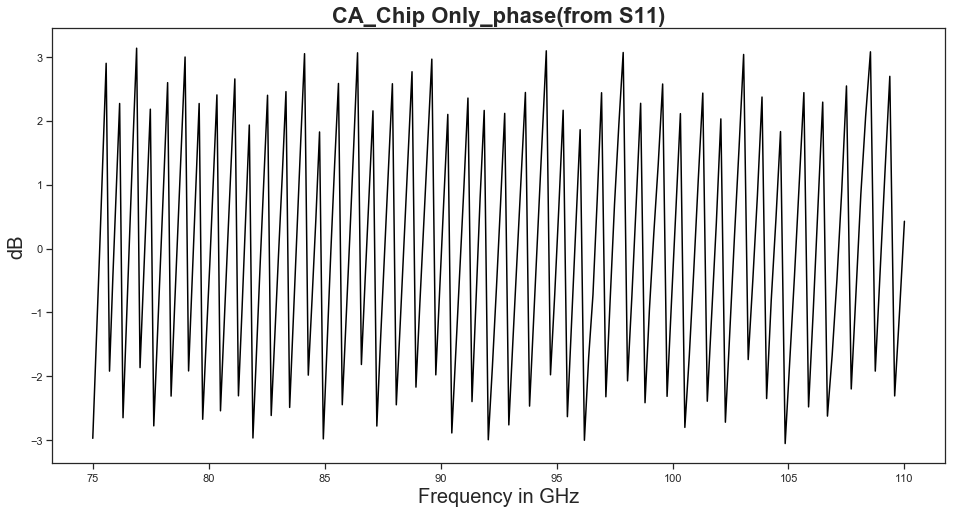

In [24]:
plt.figure(figsize=(16,8))
plt.plot(gigahertz, phase_memory_S11(CA_only_chip_data), color='black')
#plt.legend(loc='best')
plt.title("CA_Chip Only_phase(from S11)", fontsize=22, fontweight='bold')
plt.xlabel("Frequency in GHz", fontsize=20)
plt.ylabel("dB", fontsize=20)
#plt.ylim(-180,180)
fname = 'CA_chip_only_phase.jpg'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

 Figure:CA_E_field_combo_all_reflections_S11.png


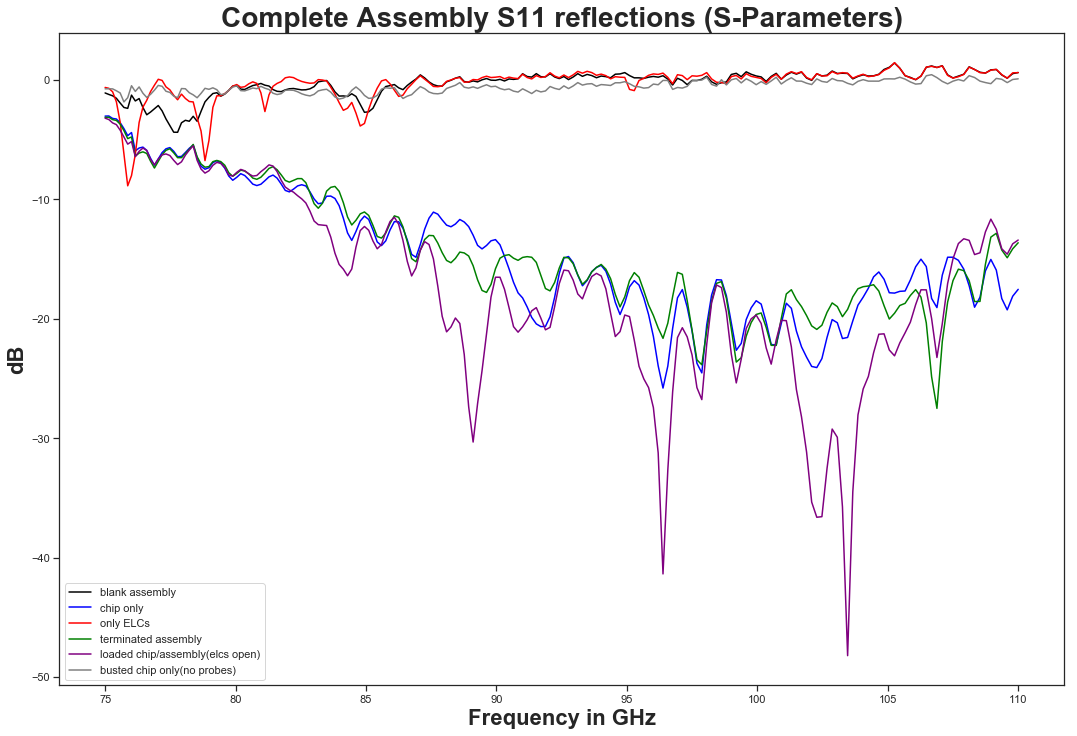

In [25]:
plt.figure(figsize=(18,12))
plt.plot(gigahertz, db_magnitude_S11(CA_blank_data),
         color='black', label='blank assembly')
plt.plot(gigahertz, db_magnitude_S11(CA_only_chip_data),
         color='blue', label='chip only')
plt.plot(gigahertz, db_magnitude_S11(CA_only_elcs_data),
         color='red', label='only ELCs')
plt.plot(gigahertz, db_magnitude_S11(CA_terminated_data),
         color='green', label='terminated assembly')
plt.plot(gigahertz, db_magnitude_S11(CA_loaded_chip_data),
         color='purple', label='loaded chip/assembly(elcs open)')
plt.plot(gigahertz, db_magnitude_S11(CA_busted_chip_data),
         color='grey', label='busted chip only(no probes)')
# plt.plot(gigahertz, db_magnitude_S11(CA_port2_E_data),
#          color='green')
# plt.plot(gigahertz, db_magnitude_S11(CA_port3_B_data),
#          color='red')
# plt.plot(gigahertz, db_magnitude_S11(CA_port4_E_data),
#          color='green')
plt.title("Complete Assembly S11 reflections (S-Parameters)", fontsize=28, fontweight='bold')
#plt.suptitle("VNA checks for Padin", fontsize=10)
plt.xlabel("Frequency in GHz", fontsize=22, fontweight='bold')
plt.ylabel("dB", fontsize=22, fontweight='bold')
fname = 'CA_E_field_combo_all_reflections_S11.png'
plt.legend(loc='best')
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

### build an HFSS simulation of the setup with antanea there but no microstrip going out to anything.
### Ask Pete and Tom to measure the resistance of the gold on the chip and OMT before the etching process begins.
### what thickness of gold did Pete use in the HFSS model?
### Tell Padin about the resulting plot that I have and how HFSS and our plot only gives us a 1% or less signal transmission 
### we think the resistance is minimum 500ohms, the resistance is giving us at best 20 db loss and the big mystery is that the s11 seems to be low even witht he OMT on.
### doe any of this hang together. in his opinon, is it worth anything pushing forward with this. 

 Figure:gold_resistivity.jpg


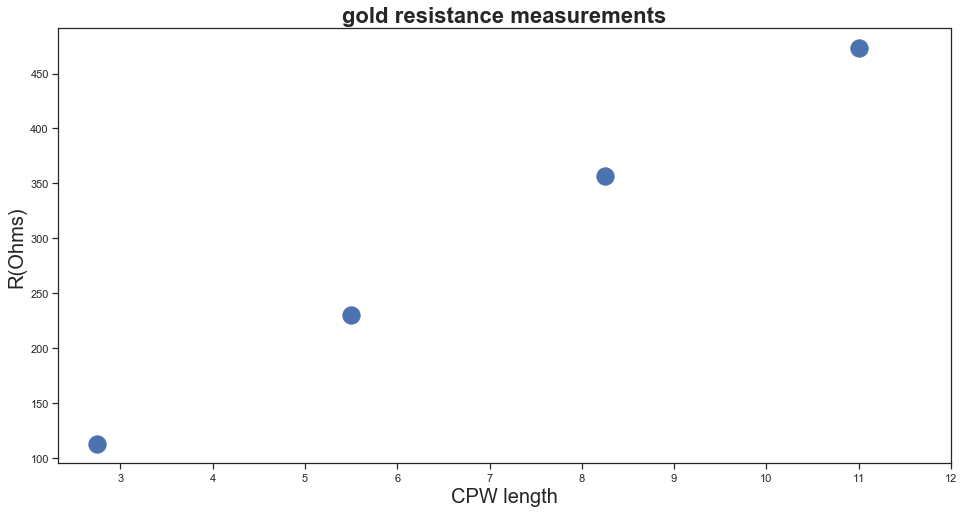

In [38]:
plt.figure(figsize=(16,8))
plt.scatter(gold_resistance_data['length'] , gold_resistance_data['omega'], s=300)
#plt.legend(loc='best')
plt.title("gold resistance measurements", fontsize=22, fontweight='bold')
plt.xlabel("CPW length", fontsize=20)
plt.ylabel("R(Ohms)", fontsize=20)
plt.xticks([3,4,5,6,7,8,9,10,11,12])
fname = 'gold_resistivity.jpg'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

In [46]:
###Loss per mm of gold calculation 
loss_full = (11/473.1)
loss_half = (5.5/230)
loss_25   = (8.25/356.5)
loss_75   = (2.75/113.1)

print(loss_full)
print(loss_half)
print(loss_25)
print(loss_75)

average_loss = ((loss_full+loss_half+loss_25+loss_75)/4)

print("loss per mm =",average_loss)

0.023250898330162754
0.02391304347826087
0.02314165497896213
0.024314765694076042
loss per mm = 0.02365509062036545
